If you run into this error:
> ---------------------------------------------------------------------------
``` ModuleNotFoundError                       Traceback (most recent call last)
<ipython-input-2-a825e4b73726> in <cell line: 9>()
      7 import seaborn as sns
      8
----> 9 from pycaret.clustering import *
     10 from sklearn.cluster import KMeans
     11 from sklearn.metrics import silhouette_score
ModuleNotFoundError: No module named 'pycaret'

**Go to runtime then restart the kernel. It should work.**

# Import
- https://towardsdatascience.com/clustering-made-easy-with-pycaret-656316c0b080

In [1]:
# !pip install --user --upgrade tables
# !pip install --user pycaret
# !pip install pycaret[full]==2.3.4
!pip install pycaret
# Install or upgrade required libraries
!pip install pandas scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.1 

In [2]:
from google.colab import drive
drive.mount('/content/drive')
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.clustering import *
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

Mounted at /content/drive


In [3]:
region=11
csv_file_path = f'/content/drive/MyDrive/MS thesis/HFCAI/RG{region}/rg{region}_HCFAI_sum.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)
df.sort_values(by='HCFAI', ascending=False).head(2)

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,POI_Presence,Nearest_RHU,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you,HCFAI
6376,3436711,Barangay 7 (Pob.),City of Malaybalay,Bukidnon,0.248322,0.000000,1.035125,1.0,0,1,1,3435329,0.838568,634.157829,458.94857,6587.349517,3307.511199,1816.469152,1488.764604,0.648082
6167,3433926,Kalabugao,Impasug-Ong,Bukidnon,0.195204,1.134438,0.414088,1.0,0,1,1,3435329,35.083947,10.577220,4.17699,82.192440,39.209840,18.745940,17.078510,0.643519


In [4]:
for i in df.columns:
  print(i)

ID
barangay_name
city_name
province_name
flood_probability_value
rain intensity_value
drought_value
buildability_landcov
RHU_Presence
Road_Presence
POI_Presence
Nearest_RHU
Distance_to_Nearest_RHU_km
popden_chi
popden_eld
popden_all
popden_wom
popden_w_1
popden_you
HCFAI


# K-means on HCFAI

## TRAIN

In [5]:
IDonly = df['ID']
IDdf = IDonly.to_frame()
IDdf

,ID
0,3268077
1,3268078
2,3268079
3,3268080
4,3268081
...,...
7930,3469905
7931,3469906
7932,3469907
7933,3469908


In [6]:
HCIdf = df[['HCFAI']]
# HCIdf = HCIdf.to_frame()
cluster = setup(HCIdf, session_id = 7652)

,Description,Value
0,Session id,7652
1,Original data shape,"(7935, 1)"
2,Transformed data shape,"(7935, 1)"
3,Numeric features,1
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


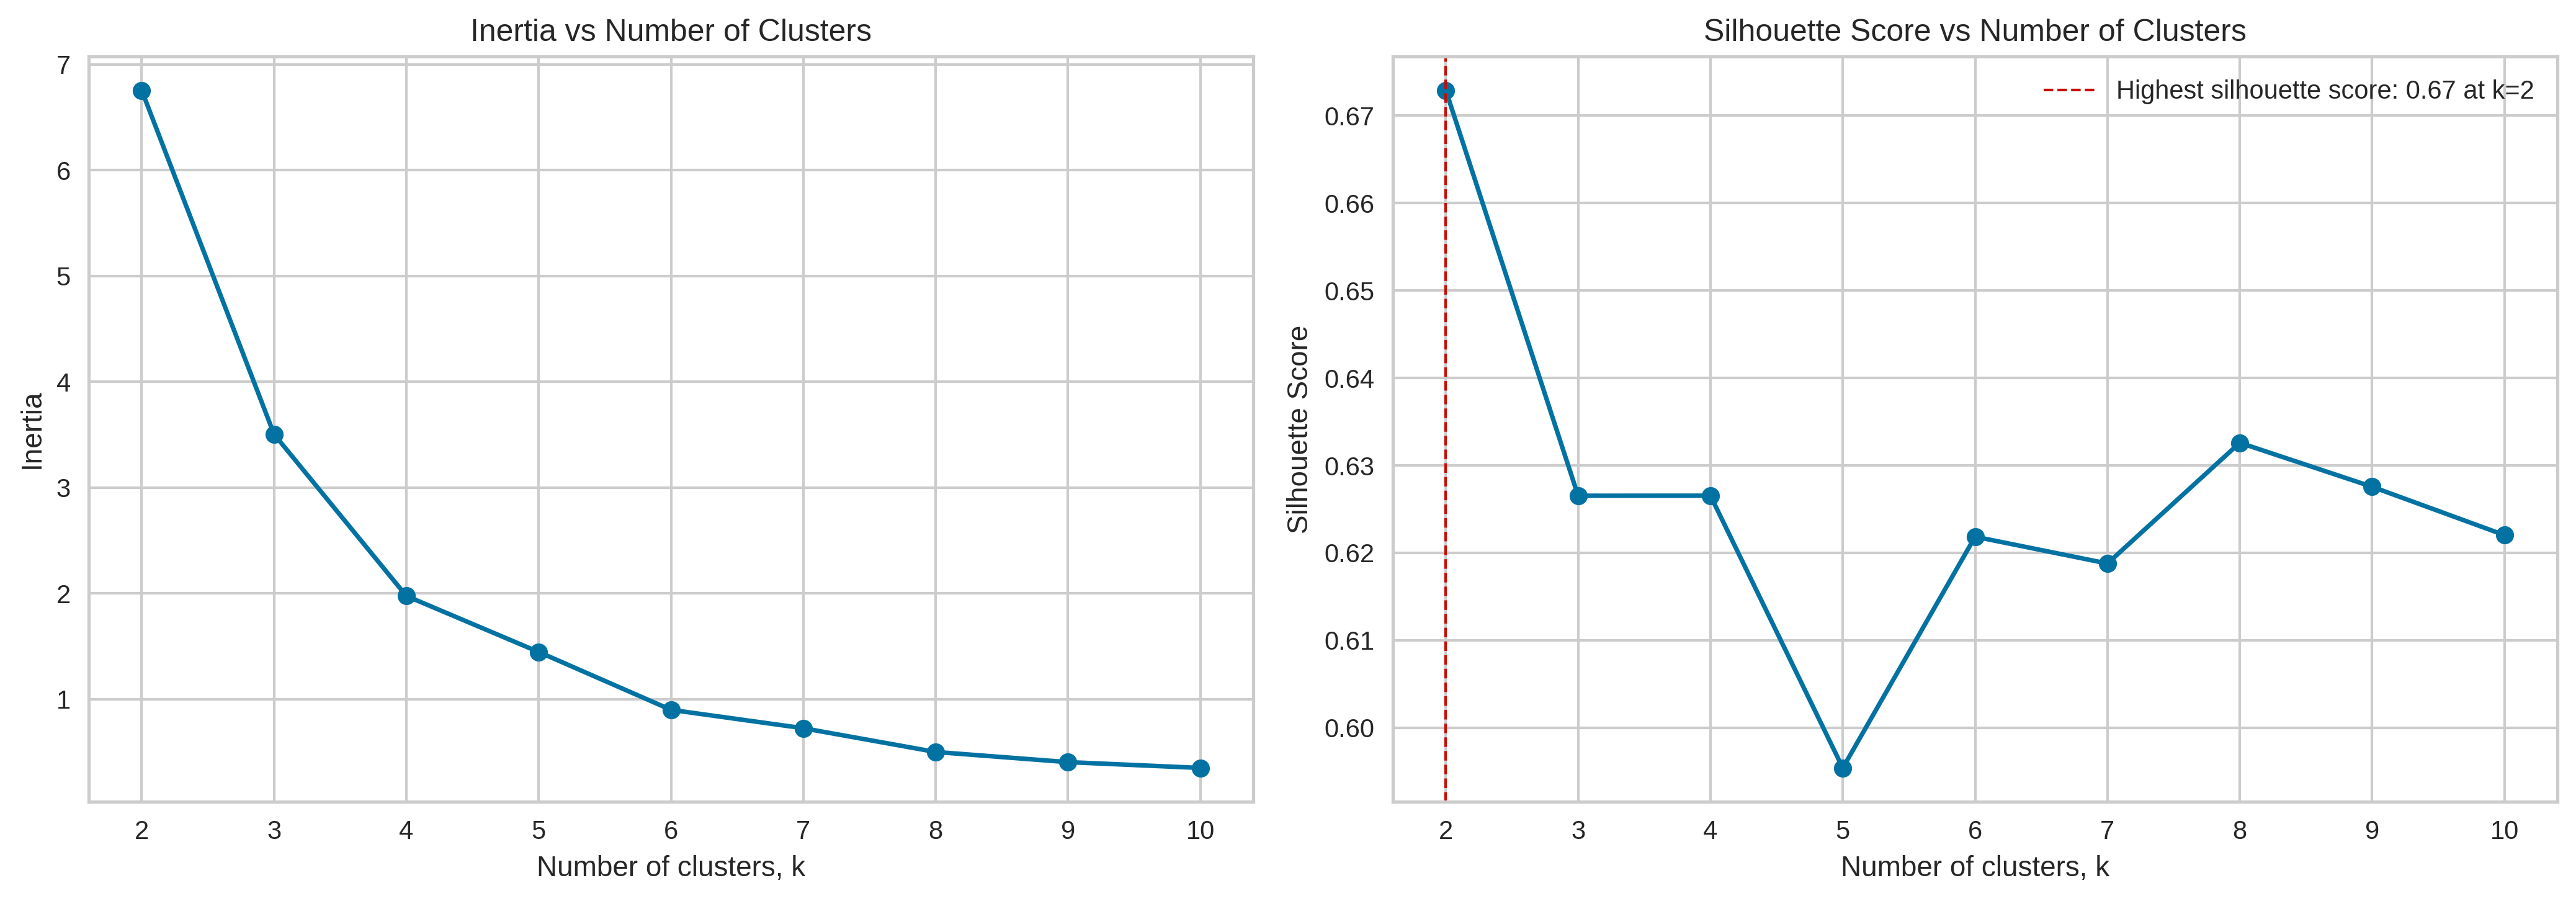

In [7]:
# Initialize lists to store inertia and silhouette scores
k_values = range(2, 11)
inertia_values = []
silhouette_scores = []

for k in k_values:
    # Create KMeans model
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(HCIdf)

    # Calculate inertia
    inertia = kmeans.inertia_
    inertia_values.append(inertia)

    # Calculate silhouette score
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(HCIdf, labels)
    silhouette_scores.append(silhouette_avg)

max_silhouette_score = max(silhouette_scores)
min_intertia_score = min(inertia_values)
max_silhouette_k = k_values[silhouette_scores.index(max_silhouette_score)]
min_intertia_k = k_values[inertia_values.index(min_intertia_score)]

# Plot the results
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
# plt.axvline(x=min_intertia_k, color='b', linestyle='--', linewidth=1, label=f'Lowest intertia score: {min_intertia_k:.2f} at k={min_intertia_k}')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.axvline(x=max_silhouette_k, color='r', linestyle='--', linewidth=1, label=f'Highest silhouette score: {max_silhouette_score:.2f} at k={max_silhouette_k}')
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
model = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6264,29567.1632,0.4841,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

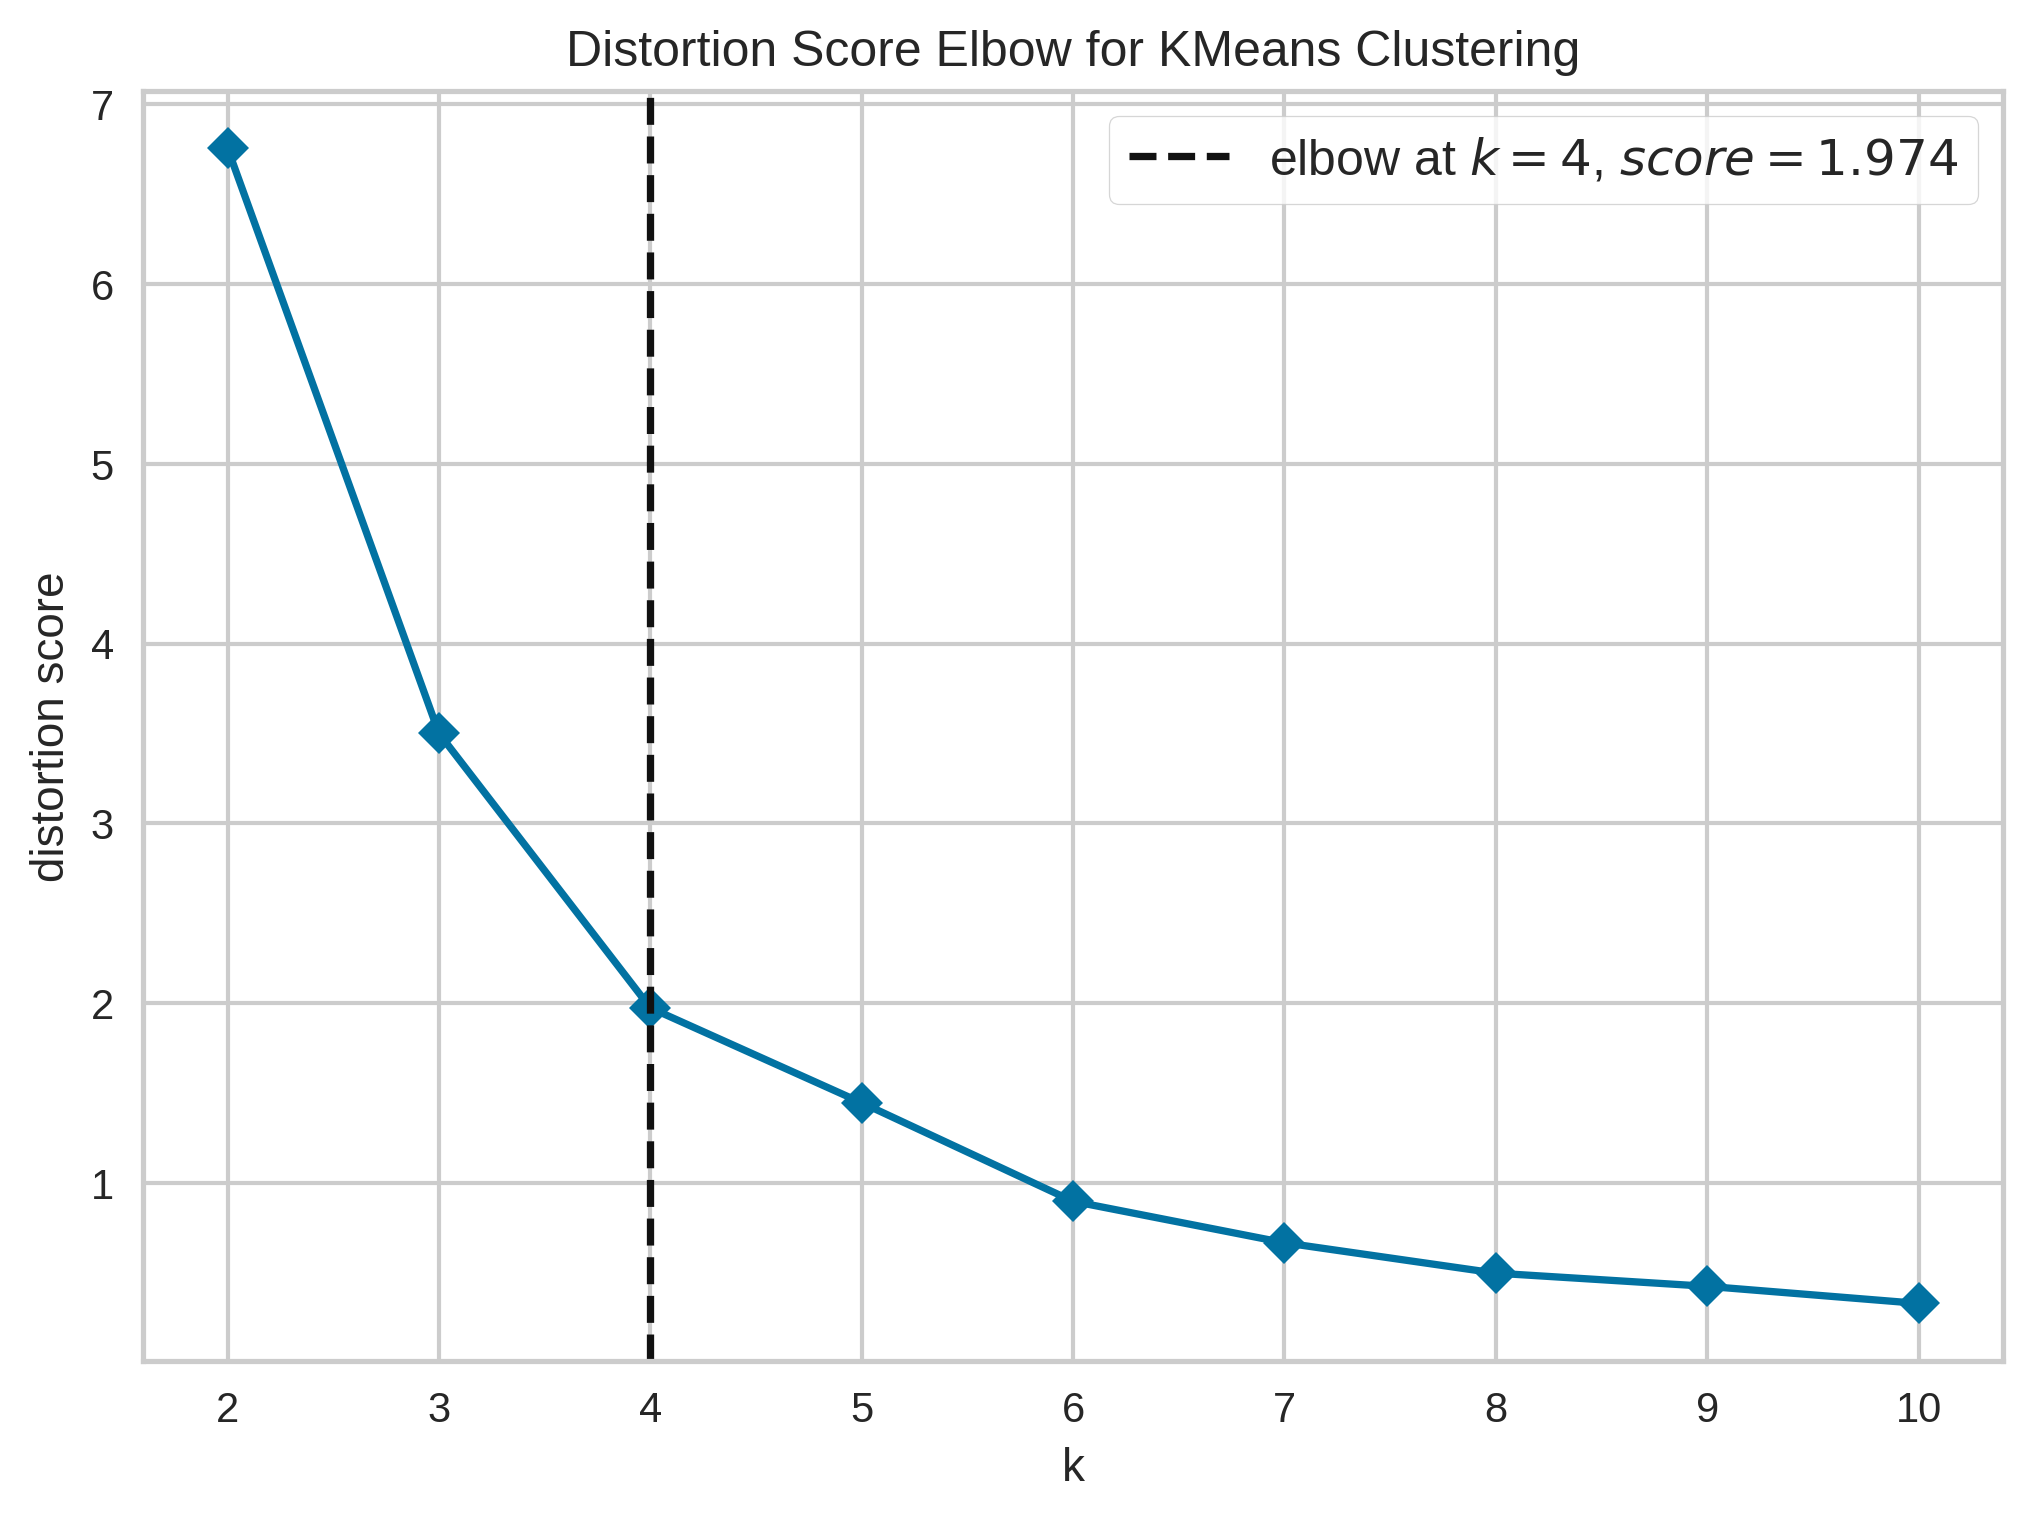

In [9]:
plot_model(model, 'elbow')

### K-means clustering model validation:
1. Intertia score
2. Silhouette score

```
Refer to comments from panel
```



In [10]:
# Evaluate the model
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Apply model on data

In [11]:
model = create_model('kmeans', num_clusters = 2)
plot_model(model,  plot = 'distribution')
# plot_model(model, 'cluster')
save_model(model, f'/content/drive/MyDrive/MS thesis/preliminary site selection/RG{region}/rg{region}-HCFAI-Clusters-silhouette')
HCFAIdf_results = assign_model(model)
HCFAIdf_results.head(10)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6735,20324.6692,0.4504,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


,HCFAI,Cluster
0,0.411524,Cluster 1
1,0.396406,Cluster 1
2,0.396597,Cluster 1
3,0.396416,Cluster 1
4,0.401542,Cluster 1
5,0.446506,Cluster 1
6,0.399422,Cluster 1
7,0.409888,Cluster 1
8,0.447766,Cluster 1
9,0.403102,Cluster 1


In [12]:
model = create_model('kmeans', num_clusters = 4)
plot_model(model,  plot = 'distribution')
# plot_model(model, 'cluster')
save_model(model, f'/content/drive/MyDrive/MS thesis/preliminary site selection/RG{region}/rg{region}-HCFAI-Clusters-inertia')
HCFAIdf_results = assign_model(model)
HCFAIdf_results.head(10)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6264,29567.1632,0.4841,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


,HCFAI,Cluster
0,0.411524,Cluster 1
1,0.396406,Cluster 1
2,0.396597,Cluster 1
3,0.396416,Cluster 1
4,0.401542,Cluster 1
5,0.446506,Cluster 3
6,0.399422,Cluster 1
7,0.409888,Cluster 1
8,0.447766,Cluster 3
9,0.403102,Cluster 1


# Fixing df for BPNN to find candidate locations

In [ ]:
HCFAIdf_results

,HCFAI,Cluster
0,0.411524,Cluster 1
1,0.396406,Cluster 1
2,0.396597,Cluster 1
3,0.396416,Cluster 1
4,0.401542,Cluster 1
...,...,...
7930,0.500000,Cluster 0
7931,0.500000,Cluster 0
7932,0.500000,Cluster 0
7933,0.500000,Cluster 0


In [ ]:
HCFAIdf_results.rename(columns={'Cluster': 'Accessibility Level'}, inplace=True)

lists = {}

for cluster_number in range(len(HCFAIdf_results['Accessibility Level'].unique())):
  cluster_name = f"Cluster {cluster_number}"
  cluster_list = HCFAIdf_results.loc[HCFAIdf_results['Accessibility Level'] == cluster_name, 'HCFAI'].tolist()
  lists[cluster_name] = cluster_list

for cluster_name, cluster_list in lists.items():
    # print(f"Cluster {cluster_name}: {cluster_list}")
    print(f"max, min, total {max(cluster_list)} | {min(cluster_list)} | {len(cluster_list)}")

x = HCFAIdf_results['HCFAI'].notna() # removing nan values
x = HCFAIdf_results[x]
x.sort_values(by='HCFAI', ascending=False)

max, min, total 0.5300993919372559 | 0.47614675760269165 | 3870
max, min, total 0.42107918858528137 | 0.3467841148376465 | 1660
max, min, total 0.6480820178985596 | 0.5302680730819702 | 991
max, min, total 0.4760638475418091 | 0.4212720990180969 | 1414


,HCFAI,Accessibility Level
6376,0.648082,Cluster 2
6167,0.643519,Cluster 2
6658,0.642557,Cluster 2
3842,0.640197,Cluster 2
3404,0.638671,Cluster 2
...,...,...
4227,0.348702,Cluster 1
2589,0.347621,Cluster 1
4119,0.346801,Cluster 1
4117,0.346784,Cluster 1


In [ ]:
x = x.replace(['Cluster 0'],int(0))
x = x.replace(['Cluster 1'],int(0))
x = x.replace(['Cluster 2'],int(1))
x = x.replace(['Cluster 3'],int(0))

x['ID'] = IDdf

df = df.merge(x, how='left', on='ID')
df = df.drop_duplicates('ID')
# df = df.drop(['Accessibility Level_x','Accessibility Level_y'], axis=1)
df.rename(columns = {'Accessibility Level':'Cluster', 'HCFAI_y': 'HCFAI'}, inplace = True)
# df[df['Cluster'] == 1]
df

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,...,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you,HCFAI_x,HCFAI,Cluster
0,3268077,Manla,Sapang Dalaga,Misamis Occidental,0.517751,0.625679,0.726204,0.0,0,0,...,16.736107,53.158016,20.180352,371.613904,179.162208,89.088896,83.182448,0.411524,0.411524,0
1,3268078,Casul,Sapang Dalaga,Misamis Occidental,0.799777,0.637678,0.760123,0.0,0,0,...,16.995602,6.644752,2.522544,46.451738,22.395276,11.136112,10.397806,0.396406,0.396406,0
2,3268079,Casul,Sapang Dalaga,Misamis Occidental,0.799777,0.637678,0.760123,0.0,0,0,...,17.179640,28.367837,33.189589,294.813589,141.001793,71.452859,60.769129,0.396597,0.396597,0
3,3268080,Casul,Sapang Dalaga,Misamis Occidental,0.799777,0.637678,0.760123,0.0,0,0,...,17.594017,19.336583,22.720481,202.067257,96.682901,49.549983,42.298767,0.396416,0.396416,0
4,3268081,El Paraiso,Sapang Dalaga,Misamis Occidental,0.612346,0.635244,0.799329,0.0,0,0,...,18.150602,26.865536,26.408392,254.685124,119.247247,58.475136,50.837339,0.401542,0.401542,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7930,3469905,Santo Domingo,San Fernando,Bukidnon,0.433440,0.752611,0.655233,0.0,0,0,...,54.406343,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
7931,3469906,San Jose,San Fernando,Bukidnon,0.471157,0.764484,0.674019,0.0,0,0,...,56.041875,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
7932,3469907,Cayaga,San Fernando,Bukidnon,0.477205,0.767902,0.682228,0.0,0,0,...,57.245252,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
7933,3469908,Cayaga,San Fernando,Bukidnon,0.477205,0.767902,0.682228,0.0,0,0,...,58.506323,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0


In [ ]:
print(df.columns)

df = df.drop(['HCFAI_x'], axis=1)
df.rename(columns = {'Accessibility Level_x':'Cluster'}, inplace = True)
df

Index(['ID', 'barangay_name', 'city_name', 'province_name',
       'flood_probability_value', 'rain intensity_value', 'drought_value',
       'buildability_landcov', 'RHU_Presence', 'Road_Presence', 'POI_Presence',
       'Nearest_RHU', 'Distance_to_Nearest_RHU_km', 'popden_chi', 'popden_eld',
       'popden_all', 'popden_wom', 'popden_w_1', 'popden_you', 'HCFAI_x',
       'HCFAI', 'Cluster'],
      dtype='object')


,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,...,Nearest_RHU,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you,HCFAI,Cluster
0,3268077,Manla,Sapang Dalaga,Misamis Occidental,0.517751,0.625679,0.726204,0.0,0,0,...,3284661,16.736107,53.158016,20.180352,371.613904,179.162208,89.088896,83.182448,0.411524,0
1,3268078,Casul,Sapang Dalaga,Misamis Occidental,0.799777,0.637678,0.760123,0.0,0,0,...,3284661,16.995602,6.644752,2.522544,46.451738,22.395276,11.136112,10.397806,0.396406,0
2,3268079,Casul,Sapang Dalaga,Misamis Occidental,0.799777,0.637678,0.760123,0.0,0,0,...,3284661,17.179640,28.367837,33.189589,294.813589,141.001793,71.452859,60.769129,0.396597,0
3,3268080,Casul,Sapang Dalaga,Misamis Occidental,0.799777,0.637678,0.760123,0.0,0,0,...,3284661,17.594017,19.336583,22.720481,202.067257,96.682901,49.549983,42.298767,0.396416,0
4,3268081,El Paraiso,Sapang Dalaga,Misamis Occidental,0.612346,0.635244,0.799329,0.0,0,0,...,3284661,18.150602,26.865536,26.408392,254.685124,119.247247,58.475136,50.837339,0.401542,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7930,3469905,Santo Domingo,San Fernando,Bukidnon,0.433440,0.752611,0.655233,0.0,0,0,...,3435329,54.406343,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0
7931,3469906,San Jose,San Fernando,Bukidnon,0.471157,0.764484,0.674019,0.0,0,0,...,3435329,56.041875,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0
7932,3469907,Cayaga,San Fernando,Bukidnon,0.477205,0.767902,0.682228,0.0,0,0,...,3435329,57.245252,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0
7933,3469908,Cayaga,San Fernando,Bukidnon,0.477205,0.767902,0.682228,0.0,0,0,...,3435329,58.506323,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0


# Export

In [ ]:
df.to_csv(f'/content/drive/MyDrive/MS thesis/preliminary site selection/RG{region}/rg{region}_clusters.csv')